<a href="https://colab.research.google.com/github/TheRaconteurs/ml_lessons/blob/main/binary_classification/frank_rosenblatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification** using Frank Rosenblatt's algorithm
---


Split in (ladybugs = 1) and (caterpillars = -1)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [35]:
n_train = len(x_train)  # dataset size
w = [0, -1]  # init vector
a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])  # decision rule
N = 50  # max iterations
L = 0.1  # step
e = 0.1  # supplement for w[0]

last_error_index = -1

for n in range(N):
    for i in range(n_train):
        if y_train[i] * a(x_train[i]) < 0:
            w[0] += L * y_train[i]  # correction w[0]
            last_error_index = i
    Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
    if Q == 0:  # num of errors
        break  

if last_error_index > -1:
    w[0] += e * y_train[last_error_index]

print(f'w = {w}')

w = [1.6000000000000003, -1]


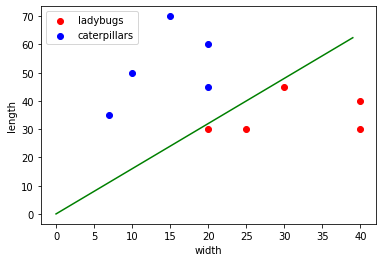

In [36]:
line_x = list(range(max(x_train[:, 0])))
line_y = [w[0] * x for x in line_x]

x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='ladybugs')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='caterpillars')
plt.plot(line_x, line_y, color='green')

plt.ylabel('length')
plt.xlabel('width')
# plt.grid(True)
plt.legend()

plt.show()